
Respondents generated this dataset to a distributed survey via Amazon Mechanical Turk between 03.12.2016 and 05.12.2016. Thirty eligible Fitbit users consented to submit personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents the use of different Fitbit trackers and individual tracking behaviors/preferences.

---
This Notebook contains Exploratory Data Analysis:
### `Dataset : Daily Stats `

# **Importing Libraries**


So, inorder to perform anything on the data we must require to import the librarires first and set the diplay view of the dataset.

### Import Libraries

This code snippet imports necessary Python libraries, `sets display options for Pandas`, and prepares the environment for data analysis and visualization.

In [4]:
# Install Pandas Profiling library from GitHub using pip
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.



  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


In [6]:
# Importing required libraries for data analysis and visualization
import pandas as pd                         # Pandas for data manipulation and analysis
import numpy as np                          # NumPy for numerical operations
import matplotlib.pyplot as plt             # Matplotlib for basic plotting
import seaborn as sns                       # Seaborn for statistical data visualization
import plotly.express as px                 # Plotly Express for interactive visualizations
import re                                   # Import the regular expression module
import warnings                             # Import warnings module for handling warnings
import ydata_profiling                     # Pandas Profiling for automated exploratory data analysis
from ydata_profiling import ProfileReport  # Importing ProfileReport class from pandas_profiling module
from scipy import stats                     # SciPy for scientific and technical computing

# Ignore all warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Setting display options for Pandas to show three decimal places for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# **Loading Dataset**

After importing librarires, we will import the dataset to be used

Continuing the setup for data analysis by adjusting `Pandas display options` and then loads a dataset into a `Pandas` DataFrame.

In [12]:
# Display all columns without truncation
pd.set_option('display.max_columns', None)

# Load related dataset from URL into multiple DataFrame
#path = '/PrepInsta-DA-Week-8-main/Merged Files/daily_stats_data.csv'
df = pd.read_csv('daily_stats_data.csv', encoding='unicode_escape')


Inspecting the columns present in every dataset.

In [13]:
# Display random row from dataframe
df.sample(5)

id activity_date  daily_average_heartrate  total_steps  \
330  3977333714    2016-04-26                      NaN        11388   
171  2022484408    2016-04-29                    81.88        10245   
769  8053475328    2016-04-13                      NaN        16433   
99   1844505072    2016-04-19                      NaN          197   
415  4388161847    2016-04-15                    65.89         8758   

     total_distance  tracker_distance  logged_activities_distance  \
330            7.62              7.62                        0.00   
171            7.19              7.19                        0.00   
769           13.35             13.35                        0.00   
99             0.13              0.13                        0.00   
415            6.73              6.73                        0.00   

     very_active_distance  moderately_active_distance  light_active_distance  \
330                  0.45                        4.22                   2.95   
171                  0.48                        1.21                   5.50   
769                 10.43                        0.47                   2.45   
99                   0.00                        0.00                   0.13   
415                  0.00                        0.00                   6.73   

     sedentary_active_distance  very_active_minutes  fairly_active_minutes  \
330                       0.00                    7                     95   
171                       0.00                   21                     40   
769                       0.00                   95                     12   
99                        0.00                    0                      0   
415                       0.00                    0                      0   

     lightly_active_minutes  sedentary_minutes  calories  \
330                     170                797      1551   
171                     281               1098      2611   
769                     156               1177      3140   
99                       10               1430      1366   
415                     299                837      3066   

     total_minutes_asleep  total_sleep_records  total_time_in_bed  bmi  \
330                250.00                 1.00             371.00  NaN   
171                   NaN                  NaN                NaN  NaN   
769                   NaN                  NaN                NaN  NaN   
99                    NaN                  NaN                NaN  NaN   
415                499.00                 1.00             526.00  NaN   

     weight_kg  weight_pounds  
330        NaN            NaN  
171        NaN            NaN  
769        NaN            NaN  
99         NaN            NaN  
415        NaN            NaN

To view the columns inside the file

In [14]:
# Viewing the columns of the dataframe
for i in df.columns:
  print(i)

id
activity_date
daily_average_heartrate
total_steps
total_distance
tracker_distance
logged_activities_distance
very_active_distance
moderately_active_distance
light_active_distance
sedentary_active_distance
very_active_minutes
fairly_active_minutes
lightly_active_minutes
sedentary_minutes
calories
total_minutes_asleep
total_sleep_records
total_time_in_bed
bmi
weight_kg
weight_pounds


#**Statistics & Data Vizualization**

## **Theoretical Data Analysis**

### 1.1. Descriptive Numeric Analysis

This code generates descriptive statistics, such as **mean, standard deviation, minimum, and maximum values**, for numerical columns in the '`df`' DataFrame.

In [15]:
# Generate descriptive statistics for numerical columns in the 'df' DataFrame
df.describe()

id  daily_average_heartrate  total_steps  total_distance  \
count        940.00                   334.00       940.00          940.00   
mean  4855407369.33                    75.97      7637.91            5.49   
std   2424805475.66                    10.34      5087.15            3.92   
min   1503960366.00                    57.87         0.00            0.00   
25%   2320127002.00                    67.51      3789.75            2.62   
50%   4445114986.00                    75.22      7405.50            5.25   
75%   6962181067.00                    81.93     10727.00            7.71   
max   8877689391.00                   107.72     36019.00           28.03   

       tracker_distance  logged_activities_distance  very_active_distance  \
count            940.00                      940.00                940.00   
mean               5.48                        0.11                  1.50   
std                3.91                        0.62                  2.66   
min                0.00                        0.00                  0.00   
25%                2.62                        0.00                  0.00   
50%                5.25                        0.00                  0.21   
75%                7.71                        0.00                  2.05   
max               28.03                        4.94                 21.92   

       moderately_active_distance  light_active_distance  \
count                      940.00                 940.00   
mean                         0.57                   3.34   
std                          0.88                   2.04   
min                          0.00                   0.00   
25%                          0.00                   1.94   
50%                          0.24                   3.37   
75%                          0.80                   4.78   
max                          6.48                  10.71   

       sedentary_active_distance  very_active_minutes  fairly_active_minutes  \
count                     940.00               940.00                 940.00   
mean                        0.00                21.16                  13.56   
std                         0.01                32.84                  19.99   
min                         0.00                 0.00                   0.00   
25%                         0.00                 0.00                   0.00   
50%                         0.00                 4.00                   6.00   
75%                         0.00                32.00                  19.00   
max                         0.11               210.00                 143.00   

       lightly_active_minutes  sedentary_minutes  calories  \
count                  940.00             940.00    940.00   
mean                   192.81             991.21   2303.61   
std                    109.17             301.27    718.17   
min                      0.00               0.00      0.00   
25%                    127.00             729.75   1828.50   
50%                    199.00            1057.50   2134.00   
75%                    264.00            1229.50   2793.25   
max                    518.00            1440.00   4900.00   

       total_minutes_asleep  total_sleep_records  total_time_in_bed   bmi  \
count                410.00               410.00             410.00 67.00   
mean                 419.17                 1.12             458.48 25.19   
std                  118.64                 0.35             127.46  3.07   
min                   58.00                 1.00              61.00 21.45   
25%                  361.00                 1.00             403.75 23.96   
50%                  432.50                 1.00             463.00 24.39   
75%                  490.00                 1.00             526.00 25.56   
max                  796.00                 3.00             961.00 47.54   

       weight_kg  weight_pounds  
count      67.00          67.00  
mean       72.04         158.81  
std        1

**Observation:**<br>
Here we get a statistical data for all the numerics value .

### 1.2. Descriptive Object Analysis

This code generates descriptive statistics for categorical columns in the '`df`' DataFrame, including **count, unique values, top value, and frequency**.

In [16]:
# Generate descriptive statistics for categorical columns in the DataFrame
df.describe(include=['object'])

activity_date
count            940
unique            31
top       2016-04-12
freq              33

**Observation:**<br>
This type of description shows the frequency of each column which is object, their frequency and the leader for every column.

### 2. Top Users by Total Steps per Day

Identify users with the highest total steps per day

In [19]:
# Create an empty list to store DataFrames
dfs = []

# Iterate over unique dates and find the top 3 users for each day
for date in df['activity_date'].unique():
    # Subset the data for the current date
    daily_data = df[df['activity_date'] == date]

    # Find the top 3 users with the maximum total steps for the current date
    top_users = daily_data.nlargest(3, 'total_steps')[['activity_date', 'id', 'total_steps']]

    # Append the top users DataFrame to the list
    dfs.append(top_users)

# Concatenate all DataFrames in the list into a single DataFrame
top_users_per_day = pd.concat(dfs, ignore_index=True)

# Display the top 3 users for each day
print(top_users_per_day)

   activity_date          id  total_steps
0     2016-04-12  8877689391        23186
1     2016-04-12  8053475328        18060
2     2016-04-12  7007744171        14172
3     2016-04-13  8053475328        16433
4     2016-04-13  8877689391        15337
..           ...         ...          ...
88    2016-05-11  2022484408        13272
89    2016-05-11  1503960366        12770
90    2016-05-12  2022484408         9117
91    2016-05-12  2026352035         8891
92    2016-05-12  8877689391         8064

[93 rows x 3 columns]


**Observation:**<br>
Her we see the top 3 Users per day on the basis of Total Steps

### 3. Least Active Users per Day

Identify users with the lowest total step per day.

In [21]:
# Create an empty list to store DataFrames
dfs = []

# Iterate over unique dates and find the bottom 3 users for each day
for date in df['activity_date'].unique():
    # Subset the data for the current date
    daily_data = df[df['activity_date'] == date]

    # Filter out users with zero total steps for the current date
    non_zero_data = daily_data[daily_data['total_steps'] > 0]

    # Find the bottom 3 users with the minimum total steps for the current date
    least_steps = non_zero_data.nsmallest(3, 'total_steps')[['activity_date', 'id', 'total_steps']]

    # Append the bottom 3 results to the list
    dfs.append(least_steps)

# Concatenate all DataFrames in the list into a single DataFrame
least_steps_per_day = pd.concat(dfs, ignore_index=True)

# Display the bottom 3 users for each day (non-zero steps)
print(least_steps_per_day)

   activity_date          id  total_steps
0     2016-04-12  1927972279          678
1     2016-04-12  8792009665         2564
2     2016-04-12  4445114986         3276
3     2016-04-13  1927972279          356
4     2016-04-13  8792009665         1320
..           ...         ...          ...
88    2016-05-11  1644430081         1329
89    2016-05-11  1624580081         3134
90    2016-05-12  4319703577           17
91    2016-05-12  4020332650          590
92    2016-05-12  4445114986          768

[93 rows x 3 columns]


**Observation:**<br>
Here we can see the least steps taken by the used on Daily basis. It shows bottom 3 persons.

### 4. Most Common Activity Types

Categorizing users with their activity levels.

In [23]:
# Define a function to categorize activity level based on distances and minutes
def categorize_activity(row):
    if row['very_active_distance'] > 0 or row['very_active_minutes'] > 30:
        return 'Very Active'
    elif row['moderately_active_distance'] > 0 or row['fairly_active_minutes'] > 30:
        return 'Moderately Active'
    elif row['light_active_distance'] > 0 or row['lightly_active_minutes'] > 30:
        return 'Lightly Active'
    elif row['sedentary_active_distance'] > 0 or row['sedentary_minutes'] > 30:
        return 'Sedentary Active'
    else:
        return 'Inactive'

# Apply the function to create a new 'activity_level' column
df['activity_level'] = df.apply(categorize_activity, axis=1)

# Create an empty list to store DataFrames
dfs = []

# Iterate over unique IDs and find the overall top user for each activity level
for user_id in df['id'].unique():
    # Subset the data for the current user
    user_data = df[df['id'] == user_id]

    # Find the top user for each activity level for the current user
    top_user_per_level = user_data.groupby('activity_level').apply(lambda x: x.nlargest(1, 'total_steps'))[['id', 'activity_level', 'total_steps']]

    # Append the top result to the list
    dfs.append(top_user_per_level)

# Concatenate all DataFrames in the list into a single DataFrame
activity_level_summary = pd.concat(dfs, ignore_index=True)

# Display the top user for each activity level overall
print(activity_level_summary)

            id     activity_level  total_steps
0   1503960366   Sedentary Active            0
1   1503960366        Very Active        18134
2   1624580081     Lightly Active         9107
3   1624580081  Moderately Active         2759
4   1624580081        Very Active        36019
..         ...                ...          ...
91  8792009665  Moderately Active         3147
92  8792009665   Sedentary Active            0
93  8792009665        Very Active         8360
94  8877689391     Lightly Active         4790
95  8877689391        Very Active        29326

[96 rows x 3 columns]


**Observation:**<br>
Here we can understand most of the peoples activeness depending on their activeness distance covered and the duration for their activeness.

### 5. Statistical Activity Minutes

Identify the minutes spent in activeness.

In [24]:
# Select relevant columns
activity_duration_columns = ['sedentary_minutes', 'very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes']

# Calculate mean, median, and standard deviation
activity_duration_stats = df[activity_duration_columns].agg(['mean', 'median', 'std']).transpose()

# Display the results
print(activity_duration_stats)

                         mean  median    std
sedentary_minutes      991.21 1057.50 301.27
very_active_minutes     21.16    4.00  32.84
fairly_active_minutes   13.56    6.00  19.99
lightly_active_minutes 192.81  199.00 109.17


**Observation:**<br>
We can see the numerical statistics of the Activeness Minutes. Sedentary Minutes lead the table, meaning that most of the people are following sedentary lifestyle.

### 6. Distance Efficiency Analysis

Measure the correlation between the distance and steps

In [25]:
# Calculate correlation between 'total_distance' and 'total_steps' columns
distance_efficiency_analysis = df[['total_distance', 'total_steps']].corr()

# Display the correlation analysis results
distance_efficiency_analysis

total_distance  total_steps
total_distance            1.00         0.99
total_steps               0.99         1.00

**Observation:**<br>
We can see the correlation between the Distance taken by the Users and the Steps Covered by them.

### 7. Correlation Analysis

Perform correlation analysis on relevant columns.

In [27]:
# Exclude non-numeric columns from the DataFrame before computing the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix for all numeric columns in the DataFrame
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                              id  daily_average_heartrate  total_steps  \
id                          1.00                     0.03         0.19   
daily_average_heartrate     0.03                     1.00         0.01   
total_steps                 0.19                     0.01         1.00   
total_distance              0.24                     0.01         0.99   
tracker_distance            0.24                    -0.01         0.98   
logged_activities_distance  0.19                     0.30         0.18   
very_active_distance        0.31                     0.02         0.74   
moderately_active_distance  0.03                    -0.01         0.51   
light_active_distance       0.02                    -0.01         0.69   
sedentary_active_distance  -0.02                     0.01         0.07   
very_active_minutes         0.30                    -0.06         0.67   
fairly_active_minutes       0.05                     0.04         0.50   
lightly_active_minutes     -0.10      

**Observation:**<br>
We see the correlation between the numerical factors of the dataframe

### 8. Outliers Detection

Identify the outliers in relevant columns.

In [28]:
# Define the z-score threshold for outlier detection
z_score_threshold = 3

# Create an empty dictionary to store outliers for each column
all_outliers = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Identify and store outliers for the current column
        outliers = df[column][np.abs(stats.zscore(df[column])) > z_score_threshold]
        all_outliers[column] = outliers

# Display the dictionary of outliers for each column
for column, outliers in all_outliers.items():
    print(f"Outliers in {column}:\n{outliers}\n")

Outliers in id:
Series([], Name: id, dtype: int64)

Outliers in daily_average_heartrate:
Series([], Name: daily_average_heartrate, dtype: float64)

Outliers in total_steps:
50     36019
780    22988
909    23186
913    29326
924    23629
927    27745
Name: total_steps, dtype: int64

Outliers in total_distance:
50    28.03
437   17.54
780   17.95
794   17.65
909   20.40
911   18.98
913   25.29
916   17.40
917   18.11
918   17.62
924   20.65
927   26.72
933   19.34
936   18.25
938   19.56
Name: total_distance, dtype: float64

Outliers in tracker_distance:
50    28.03
437   17.54
780   17.95
794   17.65
909   20.40
911   18.98
913   25.29
916   17.40
917   18.11
918   17.62
924   20.65
927   26.72
933   19.34
936   18.25
938   19.56
Name: tracker_distance, dtype: float64

Outliers in logged_activities_distance:
689   4.08
693   2.79
707   3.17
711   4.87
712   4.85
713   3.29
717   4.93
718   4.94
719   4.92
724   4.86
726   4.89
728   4.91
731   2.83
732   4.91
734   4.88
818   2.25
819 

**Observation:**<br>
Determinig the presence of outliers on every column

### 9. Average Metrics by User

Calculate average values for key metrics grouped by user.

In [30]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Exclude non-numeric columns from the DataFrame before calculating the mean
numeric_columns = df.drop(columns=non_numeric_columns)

# Group the DataFrame by 'id' and calculate the mean for each group
average_metrics_by_user = numeric_columns.groupby('id').mean()

# Display the resulting DataFrame with average metrics for each user
print(average_metrics_by_user)

            daily_average_heartrate  total_steps  total_distance  \
id                                                                 
1503960366                      NaN     12116.74            7.81   
1624580081                      NaN      5743.90            3.91   
1644430081                      NaN      7282.97            5.30   
1844505072                      NaN      2580.06            1.71   
1927972279                      NaN       916.13            0.63   
2022484408                    78.52     11370.65            8.08   
2026352035                    87.14      5566.87            3.45   
2320127002                      NaN      4716.87            3.19   
2347167796                    74.28      9519.67            6.36   
2873212765                      NaN      7555.77            5.10   
3372868164                      NaN      6861.65            4.71   
3977333714                      NaN     10984.57            7.52   
4020332650                    86.34      2267.23

**Observation:**<br>
Viewing the average metrics of indiviudal user irrespective of the dates.

### 10. Users with Most Active and Less Active Minutes

Identify users with the highest '`very_active_minutes`' or '`fairly_active_minutes`'.

In [31]:
# Sort the DataFrame by 'very_active_minutes' and 'fairly_active_minutes' in descending order,
# then select the top 10 rows and specific columns
most_active_users = df.sort_values(by=['very_active_minutes', 'fairly_active_minutes'], ascending=False).head(10)[['id', 'activity_date','very_active_minutes', 'fairly_active_minutes']]

# Display the DataFrame with information about the most active users
most_active_users

id activity_date  very_active_minutes  fairly_active_minutes
579  5577150313    2016-04-24                  210                     65
585  5577150313    2016-04-30                  207                     45
572  5577150313    2016-04-17                  200                     37
586  5577150313    2016-05-01                  194                     72
50   1624580081    2016-05-01                  186                     63
571  5577150313    2016-04-16                  184                     56
827  8378563200    2016-04-21                  137                     16
771  8053475328    2016-04-15                  132                      8
780  8053475328    2016-04-24                  129                     33
779  8053475328    2016-04-23                  125                     14

**Observation:**<br>
User ID ending wit 13, is believed to have more ativeness during the session.

Identify users with the lowest '`very_active_minutes`' or '`fairly_active_minutes`'.

In [17]:
# Filter DataFrame for users with positive 'very_active_minutes' and 'fairly_active_minutes'
filtered_less_active_users = df[(df['very_active_minutes'] > 0) & (df['fairly_active_minutes'] > 0)]

# Sort the filtered DataFrame by 'very_active_minutes' and 'fairly_active_minutes' in ascending order,
# then select the top 10 rows and specific columns
less_active_users = filtered_less_active_users.sort_values(by=['very_active_minutes', 'fairly_active_minutes']).head(10)[['id', 'activity_date', 'very_active_minutes', 'fairly_active_minutes']]

# Display the DataFrame with information about the less active users meeting the criteria
less_active_users

id activity_date  very_active_minutes  fairly_active_minutes
393  4319703577    2016-04-24                    1                      5
135  1927972279    2016-04-24                    1                      6
271  2873212765    2016-04-18                    1                      6
286  2873212765    2016-05-03                    1                      6
82   1644430081    2016-05-02                    1                      7
252  2347167796    2016-04-17                    1                      7
508  4702921684    2016-04-15                    1                      8
519  4702921684    2016-04-26                    1                      8
383  4319703577    2016-04-14                    1                      9
387  4319703577    2016-04-18                    1                      9

**Observation:**<br>
User ID ending with 77 is believed to have more sedentary lifestyle

### 11. Weight Coorelation

Measure the correlation between the weight and BMI

In [32]:
# Calculate correlation between 'bmi', 'weight_kg', and 'weight_pounds' columns
bmi_weight_correlation = df[['bmi', 'weight_kg', 'weight_pounds']].corr()

# Display the correlation analysis results
bmi_weight_correlation

bmi  weight_kg  weight_pounds
bmi           1.00       0.74           0.74
weight_kg     0.74       1.00           1.00
weight_pounds 0.74       1.00           1.00

**Observation:**<br>
Viewing the correlation of the BMI and Weight logs

### 12. Average BMI by User compared with Activeness

Calculate the average BMI for each user.

In [33]:
# Calculate average BMI by user
average_bmi_by_user = df.groupby('id')['bmi'].mean()

# Calculate mode of activity_level by user
mode_activity_by_user = df.groupby('id')['activity_level'].apply(lambda x: x.mode().iat[0])

# Combine the results into a new DataFrame
result_df = pd.DataFrame({'average_bmi': average_bmi_by_user, 'mode_activity_level': mode_activity_by_user})
result_df.reset_index(inplace=True)

# Display the result
print(result_df)

            id  average_bmi mode_activity_level
0   1503960366        22.65         Very Active
1   1624580081          NaN      Lightly Active
2   1644430081          NaN         Very Active
3   1844505072          NaN      Lightly Active
4   1927972279        47.54    Sedentary Active
5   2022484408          NaN         Very Active
6   2026352035          NaN      Lightly Active
7   2320127002          NaN      Lightly Active
8   2347167796          NaN         Very Active
9   2873212765        21.57         Very Active
10  3372868164          NaN         Very Active
11  3977333714          NaN         Very Active
12  4020332650          NaN    Sedentary Active
13  4057192912          NaN      Lightly Active
14  4319703577        27.41         Very Active
15  4388161847          NaN         Very Active
16  4445114986          NaN      Lightly Active
17  4558609924        27.21         Very Active
18  4702921684          NaN         Very Active
19  5553957443          NaN         Very

**Observation:**<br>
Its been justified that user ID ending with 79 have more sedentary lifestyle with more BMI result.

### 13. Heart Rate Abnomrality

Checking for Heart Rate Abnomarlity

In [34]:
# Filter DataFrame for rows with 'daily_average_heartrate' below 60 or above 100
abnormal_heart_rate_data = df[(df['daily_average_heartrate'] < 60) | (df['daily_average_heartrate'] > 100)]

# Displaying the relevant columns for abnormal heart rate
result = abnormal_heart_rate_data[['id', 'activity_date', 'daily_average_heartrate']]

print(result)

             id activity_date  daily_average_heartrate
431  4388161847    2016-05-01                    58.37
435  4388161847    2016-05-05                    59.21
440  4388161847    2016-05-10                    59.23
441  4388161847    2016-05-11                    57.87
442  4388161847    2016-05-12                    58.70
500  4558609924    2016-05-08                   100.43
541  5553957443    2016-04-17                    59.20
544  5553957443    2016-04-20                    59.46
568  5577150313    2016-04-13                    58.11
658  6775888955    2016-04-16                   107.72
659  6775888955    2016-04-17                   101.45
661  6775888955    2016-04-19                   106.40
662  6775888955    2016-04-20                   104.67
666  6775888955    2016-04-24                   107.09
673  6775888955    2016-05-01                   105.02


**Observation:**<br>
Everyone tends to have normal heartbeat, except some avoidable anomallies.

### 14. Sleep Tracking Users

Finding the extremity of the person having a sleep per day

In [35]:
# Find users with non-zero 'total_minutes_asleep'
non_zero_sleep_users = df[df['total_minutes_asleep'] > 0]

# Find user with the lowest minutes slept
lowest_minutes_slept = non_zero_sleep_users.sort_values(by='total_minutes_asleep').head(5)[['id', 'total_minutes_asleep']]

# Find user with the highest minutes slept
highest_minutes_slept = non_zero_sleep_users.sort_values(by='total_minutes_asleep', ascending=False).head(5)[['id', 'total_minutes_asleep']]

print("User with the Lowest Minutes Slept:")
print(lowest_minutes_slept)

print("\nUser with the Highest Minutes Slept:")
print(highest_minutes_slept)

User with the Lowest Minutes Slept:
             id  total_minutes_asleep
730  7007744171                 58.00
390  4319703577                 59.00
227  2320127002                 61.00
439  4388161847                 62.00
793  8053475328                 74.00

User with the Highest Minutes Slept:
             id  total_minutes_asleep
82   1644430081                796.00
554  5553957443                775.00
123  1927972279                750.00
110  1844505072                722.00
5    1503960366                700.00


**Observation:**<br>
We can view the users having the nesessary sleep time and some users seem to have difficulty in sleep.

## **Data Vizualization**

### 1. Heatmap

Visualizing the Distances and Steps with Heat Map

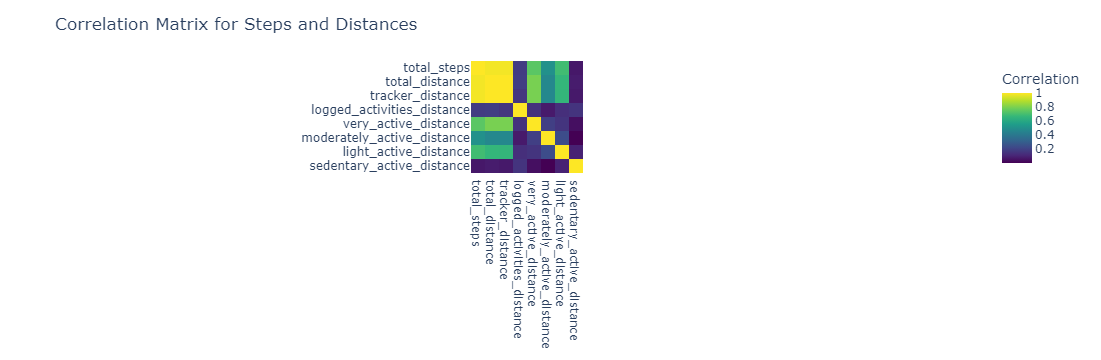

In [36]:
# Subset of columns
columns_of_interest = ['total_steps', 'total_distance', 'tracker_distance',
                         'logged_activities_distance', 'very_active_distance',
                         'moderately_active_distance', 'light_active_distance',
                         'sedentary_active_distance']

# Filter DataFrame
subset_df = df[columns_of_interest]

# Correlation Matrix
correlation_matrix = subset_df.corr()
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='viridis')
fig.update_layout(title_text='Correlation Matrix for Steps and Distances')
fig.show()

**Observation:**<br>
Viewing the heatmap of the Distance and Steps taken overall

Visualizing the Activity Minutes with Heat Map

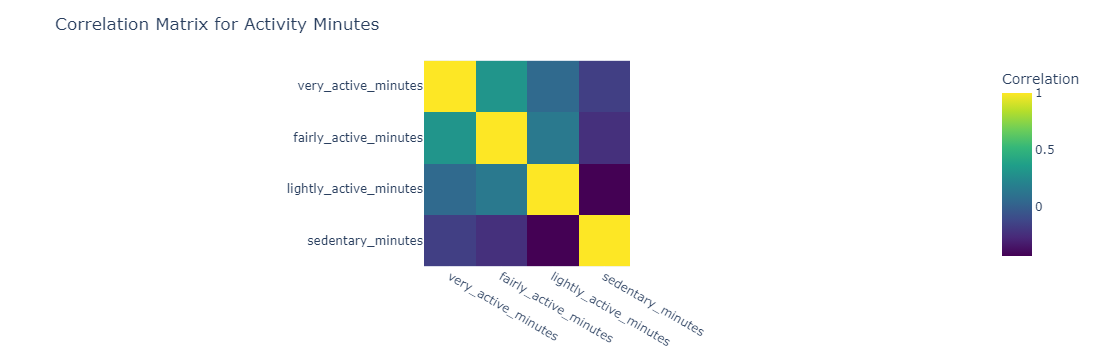

In [37]:
# Subset of columns
columns_of_interest = ['very_active_minutes', 'fairly_active_minutes',
                         'lightly_active_minutes', 'sedentary_minutes']

# Filter DataFrame
subset_df = df[columns_of_interest]

# Correlation Matrix
correlation_matrix = subset_df.corr()
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='viridis')
fig.update_layout(title_text='Correlation Matrix for Activity Minutes')
fig.show()

**Observation:**<br>
Viewing the activeness minutes over the heatmap

### 2. Scatter Plot

Visualizing the Scatter Plot on Steps and Distance

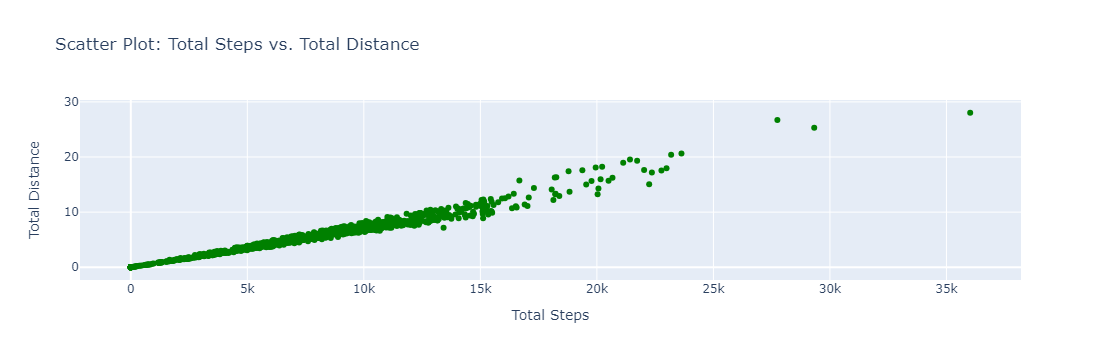

In [38]:
# Scatter Plot: total_steps vs. total_distance
fig1 = px.scatter(df, x='total_steps', y='total_distance',
                  title='Scatter Plot: Total Steps vs. Total Distance',
                  labels={'total_steps': 'Total Steps', 'total_distance': 'Total Distance'},
                  color_discrete_sequence=['green'])
fig1.show()

**Observation:**<br>
Steps and Total Distance looks justified, people take normal steps to cover a particulat step, no one seems to jump and run or cripple either.

Visualizing the Scatter Plot on Steps and Calories

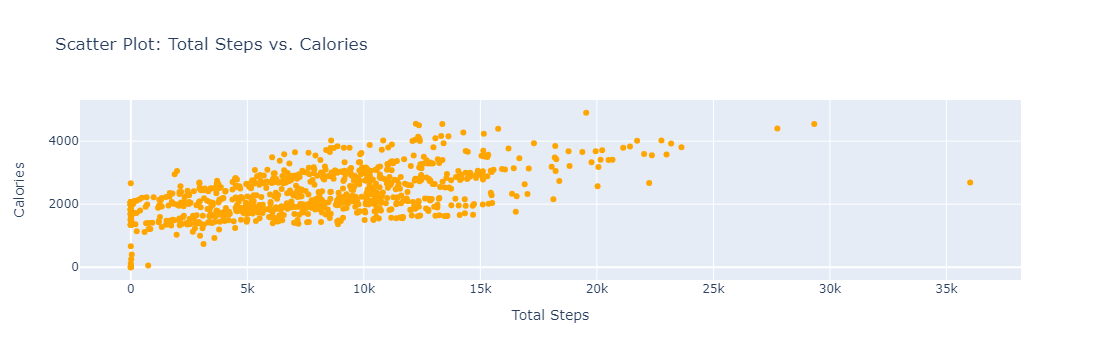

In [39]:
# Scatter Plot: total_steps vs. calories
fig2 = px.scatter(df, x='total_steps', y='calories',
                  title='Scatter Plot: Total Steps vs. Calories',
                  labels={'total_steps': 'Total Steps', 'calories': 'Calories'},
                  color_discrete_sequence=['orange'])
fig2.show()

**Observation:**<br>
Users mostly takes steps around 1k - 20k to burn calories of 1k to 4k .

Visualizing the Scatter Plot on Minutes Slept and Minutes on Bed

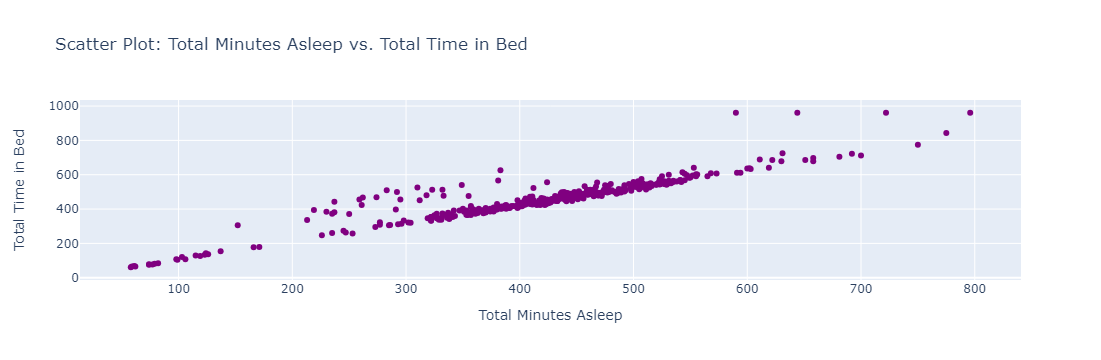

In [40]:
# Scatter Plot: total_minutes_asleep vs. total_time_in_bed
fig1 = px.scatter(df, x='total_minutes_asleep', y='total_time_in_bed',
                  title='Scatter Plot: Total Minutes Asleep vs. Total Time in Bed',
                  labels={'total_minutes_asleep': 'Total Minutes Asleep', 'total_time_in_bed': 'Total Time in Bed'},
                  color_discrete_sequence=['purple'])
fig1.show()

**Observation:**<br>
People seem to fall asleep after getting on bed, less anomalies are seen here.

Visualizing the Scatter Plot on Sedentary Minutes and Minutes Slept

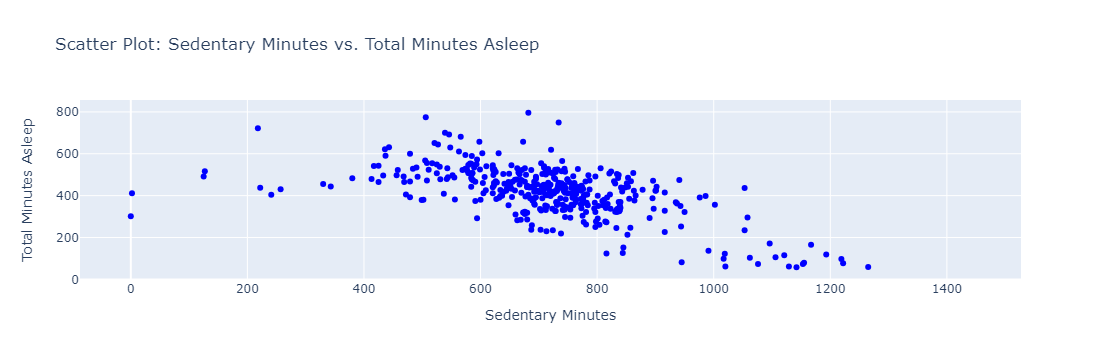

In [41]:
# Scatter Plot: sedentary_minutes vs. total_minutes_asleep
fig2 = px.scatter(df, x='sedentary_minutes', y='total_minutes_asleep',
                  title='Scatter Plot: Sedentary Minutes vs. Total Minutes Asleep',
                  labels={'sedentary_minutes': 'Sedentary Minutes', 'total_minutes_asleep': 'Total Minutes Asleep'},
                  color_discrete_sequence=['blue'])
fig2.show()

**Observation:**<br>
Most people tend to have sedentary lifestyle while using the fitness tracker.

### 3. Pair Plot

Visualizing the Pair Plot on Calories, Steps and Distance

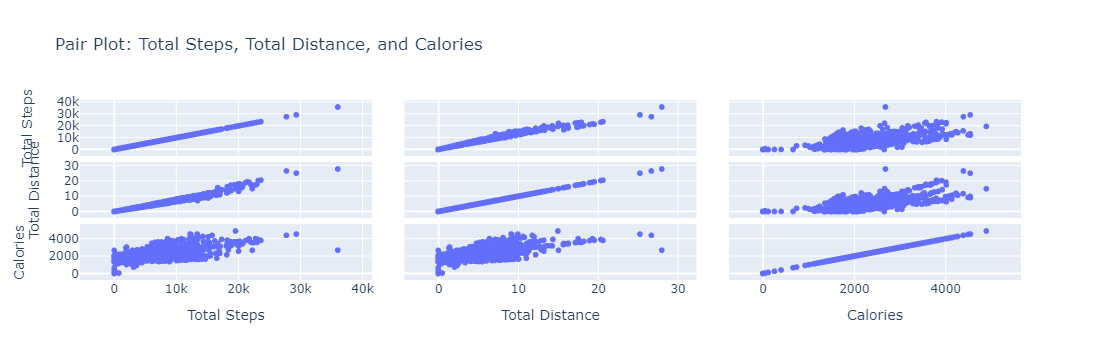

In [42]:
# Pair Plot: total_steps, total_distance, and calories
fig = px.scatter_matrix(df[['total_steps', 'total_distance', 'calories']],
                        title='Pair Plot: Total Steps, Total Distance, and Calories',
                        labels={'total_steps': 'Total Steps', 'total_distance': 'Total Distance', 'calories': 'Calories'},)
fig.show()

**Observation:**<br>
Display the pair plots of scatter of Total Steps and Total Distance covered and Calories burnt

### 4. Bar Plot

Visualizing the Bar Plot on Date and Average HeartRate [Sum]

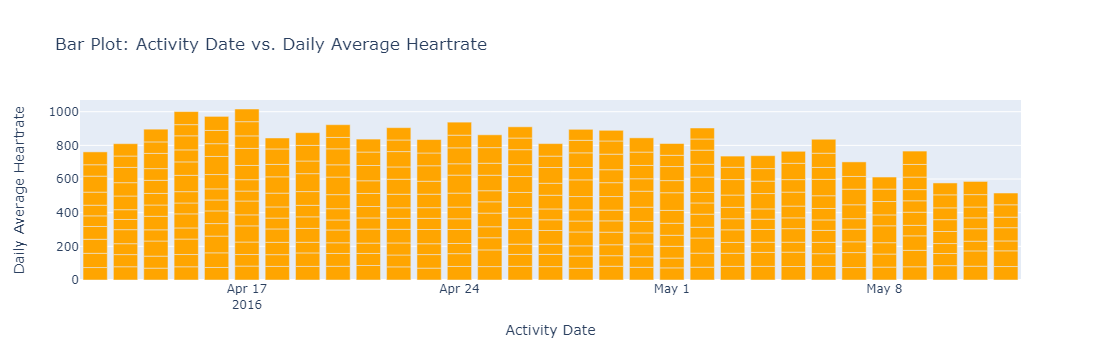

In [43]:
# Bar Plot: activity_date vs. daily_average_heartrate
fig1 = px.bar(df, x='activity_date', y='daily_average_heartrate',
              title='Bar Plot: Activity Date vs. Daily Average Heartrate',
              labels={'activity_date': 'Activity Date', 'daily_average_heartrate': 'Daily Average Heartrate'},
              color_discrete_sequence=['orange'])
fig1.show()

**Observation:**<br>
Overall, everyone tend to have normal heartrate, no anomallies seen.

Visualizing the Bar Plot on Date and User Steps [Sum]

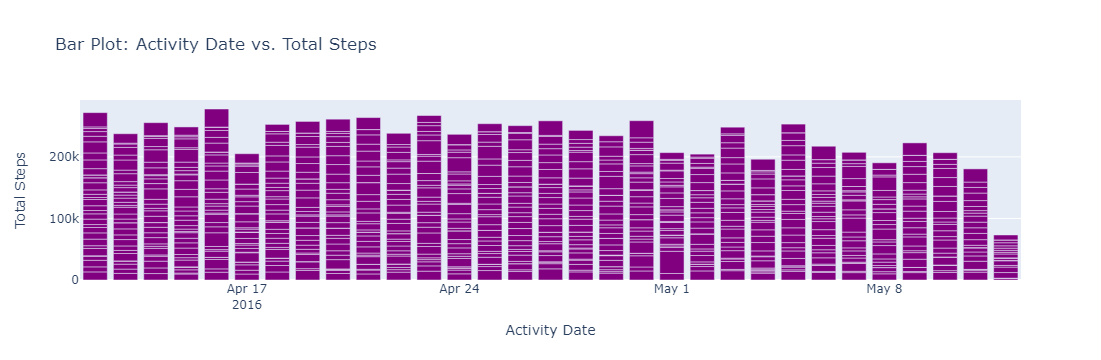

In [44]:
# Bar Plot: activity_date vs. total_steps
fig2 = px.bar(df, x='activity_date', y='total_steps',
              title='Bar Plot: Activity Date vs. Total Steps',
              labels={'activity_date': 'Activity Date', 'total_steps': 'Total Steps'},
              color_discrete_sequence=['purple'])
fig2.show()

**Observation:**<br>
On the last day, people seem to take less walk for the given session.

Visualizing the Bar Plot on Date and User Calories Burnt [Sum]

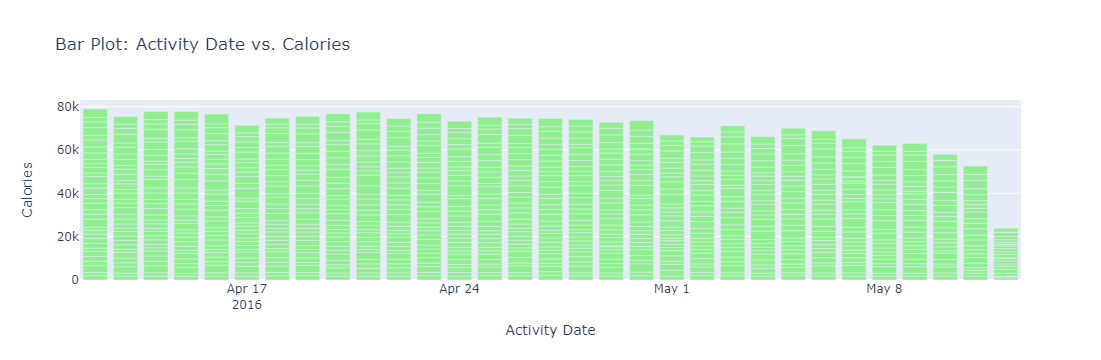

In [45]:
# Bar Plot: activity_date vs. calories
fig3 = px.bar(df, x='activity_date', y='calories',
              title='Bar Plot: Activity Date vs. Calories',
              labels={'activity_date': 'Activity Date', 'calories': 'Calories'},
              color_discrete_sequence=['lightgreen'])
fig3.show()

**Observation:**<br>
People seem to burn less calories on the last day of the session.

### 5. Categorical Plot

Visualizing the Pie Plot on Activity Stats

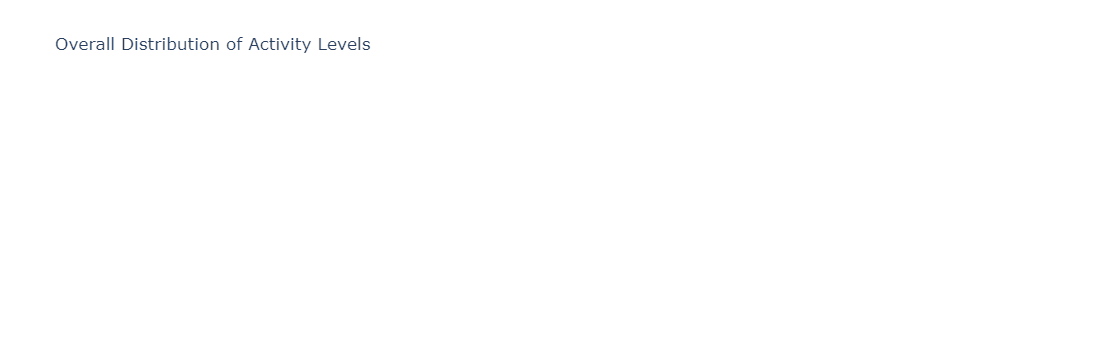

In [47]:

# Create a DataFrame to store the overall counts for each activity level
activity_level_counts = df['activity_level'].value_counts().reset_index()

# Plot a pie chart using Plotly
fig = px.pie(activity_level_counts, names=activity_level_counts.index, values='activity_level',
             title='Overall Distribution of Activity Levels',
             labels={'index': 'Activity Level', 'activity_level': 'Count'},
             color_discrete_sequence=px.colors.sequential.Viridis)

fig.show()


**Observation:**<br>
After comparing with the distance and activeness misnutes, people tend to be very active and fairly active as compared to sedentary.

Visualizing the Stacked Bar Plot on Date and Distance Categories

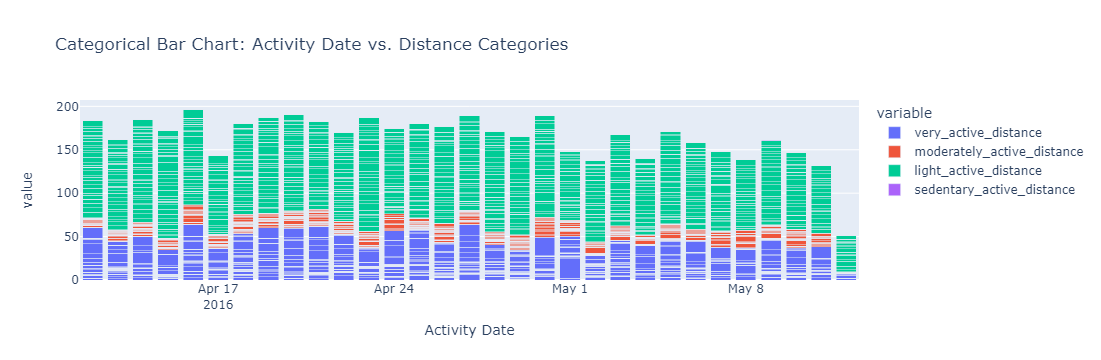

In [48]:
# Categorical Bar Chart: Distance Categories
distance_columns = ['very_active_distance', 'moderately_active_distance', 'light_active_distance', 'sedentary_active_distance']
fig_distance = px.bar(df, x='activity_date', y=distance_columns,
                     title='Categorical Bar Chart: Activity Date vs. Distance Categories',
                     labels={'activity_date': 'Activity Date'},
                     barmode='stack')
fig_distance.show()

**Observation:**<br>
Most people cover light distance then some people cover active distance as compare to few.

Visualizing the Stacked Bar Plot on Date and Activity Minute Categories

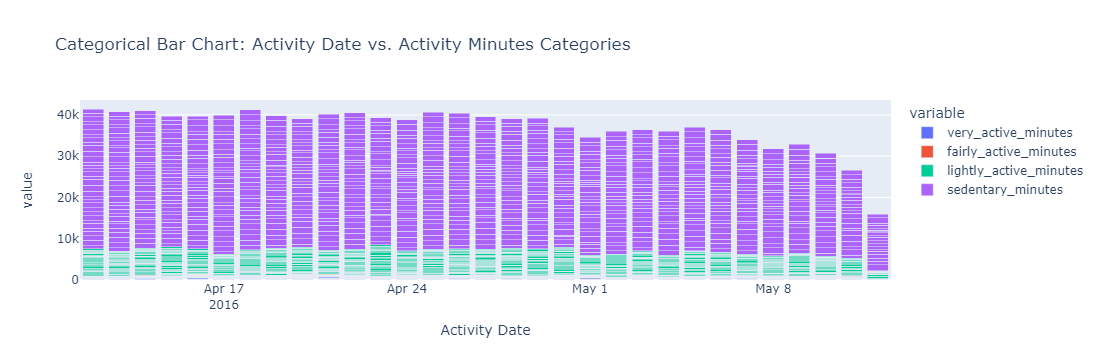

In [49]:
# Categorical Bar Chart: Minutes Categories
minutes_columns = ['very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes']
fig_minutes = px.bar(df, x='activity_date', y=minutes_columns,
                    title='Categorical Bar Chart: Activity Date vs. Activity Minutes Categories',
                    labels={'activity_date': 'Activity Date'},
                    barmode='stack')
fig_minutes.show()

**Observation:**<br>
We believe that most people spend their time in sedentary lifestyle, need to be more active.

## **Pandas Profiling**

Generating a whole report on HTML using Pandas Profiling

In [35]:
# Generate a Pandas Profiling report for the DataFrame and customize the title and HTML output file
profile = ProfileReport(df, title="Daily Stats", html={'style' : {'full_width':True}})

# Save the generated report to an HTML file named "Daily Activity.html"
profile.to_file(output_file="Daily Activity.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]